In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import glob as glob
import os
%matplotlib inline

In [2]:
def to_seconds(timestamp):
    ts = timestamp.split(':')
    return float(float(ts[0])*60*60 + float(ts[1])*60 + float(ts[2]))

def parse_mdtest(files):
    r = []
    for fname in sorted(files):
        with open(fname) as f:
            data = json.load(f)
            for line in data['stdout_lines']:
                if "started" in line: start = line.split()[4]
                if "finished" in line: end = line.split()[4]            
            r.append(to_seconds(end) - to_seconds(start))
    return r

def parse_delta(files):
    r = []; o = []
    for fname in sorted(files):
        with open(fname) as f:
            data = json.load(f)       
            r.append(to_seconds(data['delta']))
            try:
                o.append(float(data['stdout']))
            except:
                o.append(0)
    return r, o

def label(string):
    if 'nojournal' in string:
        return "No\nJournal"
    return string.replace("journal", '')

452.725592855
454.404945904
451.058606935
449.403852033
baseline=100K/runtime=100K/216.466666667=461.964890668


,job,mean,std
0,No\nJournal,1.000000,0.004420
1,30,0.996304,0.013669
2,120,1.003696,0.015866
3,210,1.007391,0.015319


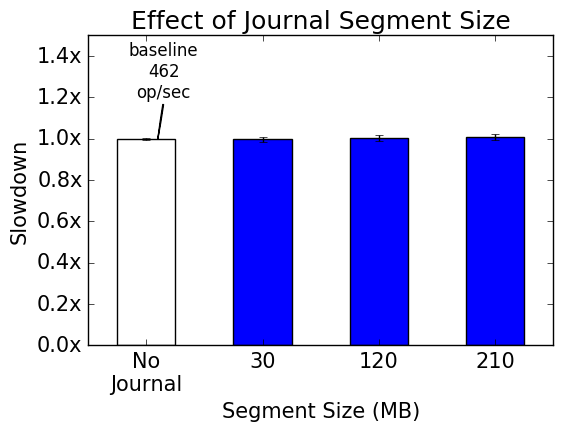

In [3]:
mean = 0
df = pd.DataFrame(columns=["job", "mean", "std"])
for s in ["nojournal", "journal30", "journal120",  "journal210"]:    
    d = parse_mdtest(glob.glob('../results-5clients-g1-10G/' + s + '-cache/' + 'mdtest-100000-*'))
    if mean == 0:
        mean = np.mean(d)
    print 1*98000/np.mean(d)
    df.loc[len(df)] = [label(s), np.mean(d/mean), np.std(d/mean)]    

font = {'size'   : 15}; matplotlib.rc('font', **font)
fig, ax = plt.subplots(1, 1)
df.plot.bar(ax=ax, y='mean', yerr='std', color=['white', 'b','b','b','b','b','b',])
ax.legend().remove()
ax.set_title("Effect of Journal Segment Size")
ax.set_ylabel("Slowdown")
ax.set_ylim(0, 1.5)
ax.set_xlabel("Segment Size (MB)")
ax.set_xticklabels(df['job'], rotation=0)
ax.set_yticklabels(['{:3.1f}x'.format(y) for y in ax.get_yticks()])

# draw arrow
arrw = dict(facecolor='black', headwidth=0.5, width=0.5, shrink=1)
args = {'horizontalalignment': 'center', 'fontsize': 12, 'arrowprops': arrw}
ax.annotate("baseline\n462\nop/sec", xy=(0.1, 1), xytext=(0.15, 1.2), **args)
fig.savefig('../../../paper/graphs/slowdown-journal.png', bbox_inches='tight', dpi=400)
print "baseline=100K/runtime=100K/" + str(mean) + "=" + str(100000/mean)
print "total=" + str(5)
df

In [12]:
for i in [1, 5, 10, 15, 20]:
    for s in ["nojournal", "journal30", "journal120",  "journal210"]:   
        d = parse_mdtest(glob.glob('../results-' + str(i) + 'clients-g1-10G/' + s + '-cache/' + 'mdtest-100000-*'))
        print str(i) + "clients=" + str(i*100000/np.mean(d))


1clients=622.406639004
1clients=612.244897959
1clients=627.615062762
1clients=627.615062762
5clients=2309.82445334
5clients=2318.39258114
5clients=2301.31942314
5clients=2292.87679609
10clients=2537.85635733
10clients=2583.31180573
10clients=2590.67357513
10clients=2605.29743812
15clients=2542.94755877
15clients=2647.99340944
15clients=2676.65952891
15clients=2638.98662913
20clients=2607.08486747
20clients=2736.10944438
20clients=2793.77527264
20clients=2780.75909845
